In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
plt.style.use("dark_background")
%matplotlib inline

In [2]:
def prepare_country_stats(oecd, gdp):
    oecd = oecd[oecd["INEQUALITY"]=="TOT"]
    oecd = oecd.pivot(index="Country", columns="Indicator", values="Value")
    
    gdp.rename(columns={"2018": "GDP per capita"}, inplace=True)
    gdp.set_index("Country Name", inplace=True)
    gdp = gdp[["GDP per capita"]]
    
    full_country_stats = pd.merge(left=oecd, right=gdp, left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 15, 22, 34]
    keep_indices = list(set(range(len(full_country_stats))) - set(remove_indices))
    
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices], full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

In [3]:
oecd_bli = pd.read_csv("oecd_bli.csv", thousands=",")
gdp_per_capita = pd.read_csv("gdp_per_capita.csv", thousands=",")
country_stats_train, country_stats_pred = prepare_country_stats(oecd_bli, gdp_per_capita)
print("Country stats for training:", country_stats_train.index)
print("Country stats for predict (answers):", country_stats_pred.index)

Country stats for training: Index(['Brazil', 'Turkey', 'Mexico', 'Poland', 'Hungary', 'Lithuania',
       'Slovak Republic', 'Greece', 'Estonia', 'Czech Republic', 'Portugal',
       'Spain', 'Italy', 'Japan', 'France', 'Israel', 'New Zealand', 'Canada',
       'Belgium', 'Germany', 'Finland', 'Austria', 'Netherlands', 'Sweden',
       'Australia', 'Denmark', 'United States', 'Iceland', 'Norway',
       'Switzerland', 'Luxembourg'],
      dtype='object')
Country stats for predict (answers): Index(['South Africa', 'Colombia', 'Chile', 'Latvia', 'Slovenia',
       'United Kingdom', 'Ireland'],
      dtype='object')


In [4]:
X = np.c_[country_stats_train["GDP per capita"]]
y = np.c_[country_stats_train["Life satisfaction"]]

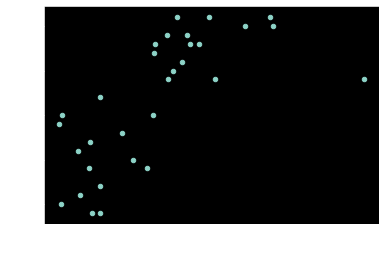

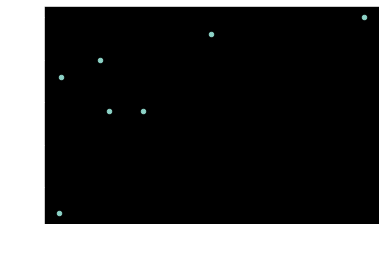

In [5]:
country_stats_train.plot(kind="scatter", x="GDP per capita", y="Life satisfaction")
country_stats_pred.plot(kind="scatter", x="GDP per capita", y="Life satisfaction")
plt.show()

In [6]:
country_stats_pred

,GDP per capita,Life satisfaction
South Africa,6374.015446,4.7
Colombia,6651.291293,6.3
Chile,15923.359062,6.5
Latvia,18088.927252,5.9
Slovenia,26234.022896,5.9
United Kingdom,42491.364435,6.8
Ireland,78806.431996,7.0


In [7]:
# I choose Latvia is because I use MikroTik RouterBoard :)
X_new = country_stats_pred.loc["Latvia"]["GDP per capita"]
X_new = [[X_new]]  # Must pass the prediction value as list
y_new = country_stats_pred.loc["Latvia"]["Life satisfaction"]

In [8]:
model_reg = LinearRegression()
model_reg.fit(X=X, y=y, sample_weight=None)
satisfaction_reg = model_reg.predict(X=X_new)
print("Predicted life satisfaction by LinearRegression model is", satisfaction_reg, " And actual value is", y_new)

Predicted life satisfaction by LinearRegression model is [[6.16721237]]  And actual value is 5.9


In [9]:
model_knr = KNeighborsRegressor(n_neighbors=3)
model_knr.fit(X=X, y=y)
satisfaction_knr = model_knr.predict(X=X_new)
print("Predicted life satisfaction by KNeighborsRegressor model is", satisfaction_knr, " And actual value is", y_new)

Predicted life satisfaction by KNeighborsRegressor model is [[5.9]]  And actual value is 5.9
